<a href="https://colab.research.google.com/github/aylaIssi/Denetimsiz-Ogrenme/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction with Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

##  Simple Linear Regression with OLS Using Scikit-Learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS_Notlar/machine_learning/datasets/advertising.csv')

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [ ]:
df.shape

(200, 4)

In [ ]:
X = df[["TV"]]
y = df[["sales"]]

## **Model**

In [ ]:
reg_model = LinearRegression().fit(X, y)

In [ ]:
# y_hat = b + w*TV

# sabit (b - bias)
reg_model.intercept_[0]


7.032593549127695

In [ ]:
# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.04753664043301975

## **Tahmin**

In [ ]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [ ]:
# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.800913765637567

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


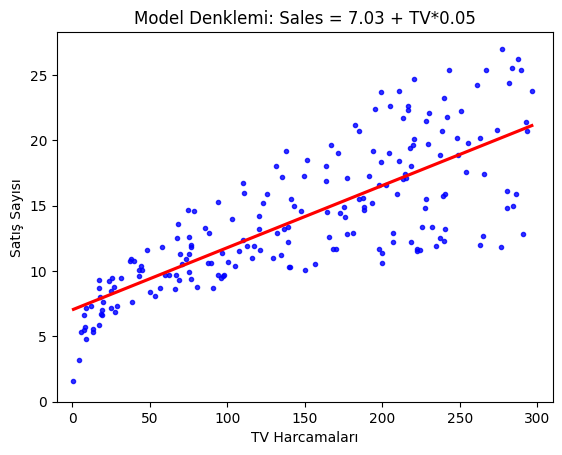

In [ ]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

## **Tahmin Başarısı**

In [ ]:
#MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656757

In [ ]:
y.mean()

sales   14.02
dtype: float64

In [ ]:
y.std()

sales   5.22
dtype: float64

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [ ]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

In [ ]:
# R-KARE
reg_model.score(X, y)

0.611875050850071

## **Multiple Linear Regression**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS_Notlar/machine_learning/datasets/advertising.csv')

In [ ]:
data.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [ ]:
X = data.drop('sales', axis=1)

In [ ]:
y = data[["sales"]]

## **Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
y_test.shape
y_train.shape

(160, 1)

In [ ]:
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
 #sabit (b - bias)
reg_model.intercept_

array([2.90794702])

In [ ]:
# coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

## **Tahmin**

In [ ]:
# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# 0.0468431 , 0.17854434, 0.00258619

# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

6.20213102

In [ ]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

reg_model.predict(yeni_veri)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

## **Tahmin Başarısını Değerlendirme**

In [ ]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [ ]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.8959372632325174

In [ ]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581587

In [ ]:
# Test RKARE
reg_model.score(X_test, y_test)

0.8927605914615384

In [ ]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

1.6913531708051797

In [ ]:
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

1.7175247278732086